# Exercise 1 - Discrete random variable

The probability distribution function of a discrete variable k is given by the following:
p(k) = k/ 15  with k = 1, 2, 3, 4, 5
0 otherwise
1) write the R probability functions for the probability density and cumulative distribution functions,
following the R naming convention
2) produce two plots showing the pdf and cdf, separately
3) compute, using R, the mean value and variance of the probability distribution
4) compute, using R, the expected value E [k (6 − k)]=E[k]*6-E[k*k]
5) write the R function that allows to sample random numbers from the probability distribution
6) using the implemented function (point (5)), sample 10 5 random numbers from this distribution and
plot them in a graph showing the distribution of the numbers superimposed to the pdf (normalize
properly the plots with random numbers)

In [1]:
library(ggplot2)
library(RColorBrewer)
library(triangle)

#### 1. 
write the R probability functions for the probability density and cumulative distribution functions, following the R naming convention ; produce two plots showing the pdf and cdf, separately

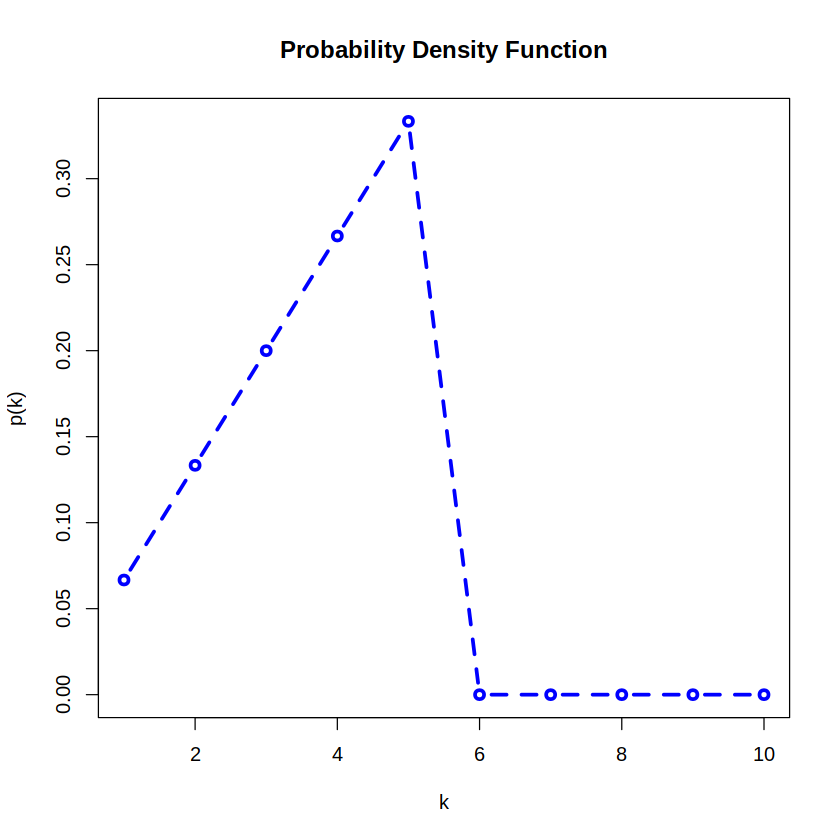

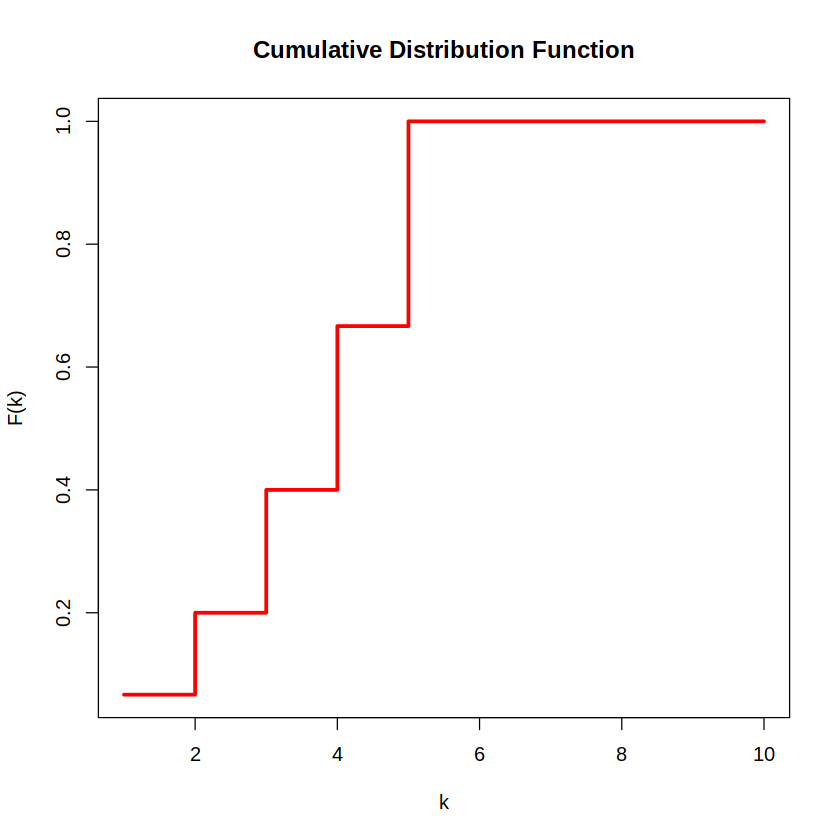

In [118]:
#define the pdf
pdf <- function(k) {
  ifelse(k >= 1 & k <= 5, k/15, 0)
}

cdf <- function(x) {
  sum(pdf(1:x))
}

# create a sequence of values for k
k <- 1:10

# plot the PDF
par(mfrow=c(1,1.5))
prob <- pdf(k)
plot(k, prob, type="b", lty=2, lwd=3, col="blue", xlab="k", ylab="p(k)", main="Probability Density Function")

# plot the CDF
cum_prob <- sapply(k, cdf)
plot(k, cum_prob, type="s", lwd=3, col="red", xlab="k", ylab="F(k)", main="Cumulative Distribution Function")

#### 3.
compute, using R, the mean value and variance of the probability distribution.
To compute the mean value and variance of the probability distribution in R, we can use the following formulas:

Mean = ∑[k * p(k)]

Variance = ∑[(k - Mean)^2 * p(k)]




In [110]:
# Define the values of k
x <- 1:5

# create vector for probability
probability <- pdf(x)

mean_value<-sum(x*probability)
variance<-(sum(x*x*probability)-sum(x*probability)*sum(x*probability))

cat("Mean: ", mean_value, "\n")
cat("Variance: ", variance, "\n")

Mean:  3.666667 
Variance:  1.555556 


#### 4.
compute, using R, the expected value $E [k (6 − k)]=E[k]·6-  E[k^2]$

In [113]:
# create vector for value
x <- 1:5

# Compute the expected value of k
mean_k <- sum(x * pdf(x))

# Compute the expected value of k^2
mean_k2 <- sum(x^2 * pdf(x))

# Compute E[k(6-k)]
mean <- mean_k * 6 - mean_k2

cat("Expected value of k(6-k): ", mean, "\n")

Expected value of k(6-k):  7 


#### 5.
write the R function that allows to sample random numbers from the probability distribution

#### 6.
using the implemented function, sample $10^5$ random numbers from this distribution and
plot them in a graph showing the distribution of the numbers superimposed to the pdf (normalize
properly the plots with random numbers)

In [83]:
u <- runif(1)
u

[1] 0.5650761

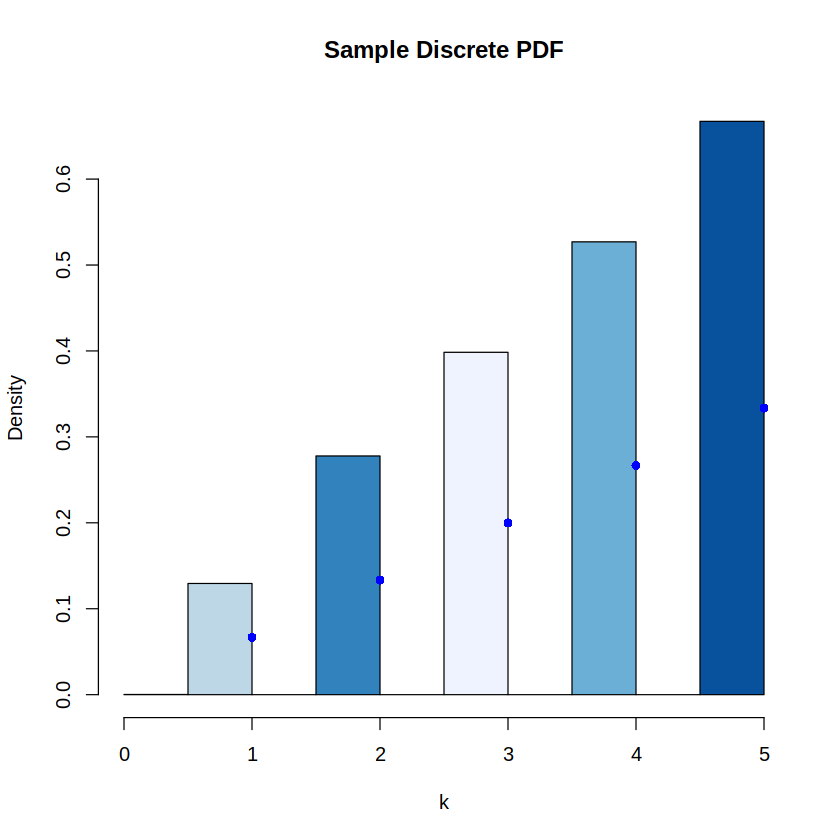

In [131]:
# create a sequence of values for k and comèute the cdf
k <- 1:5
cum_prob <- sapply(k, cdf)
prob<-pdf(k)

iter<- 0
generator <- function(number_points=10000){
    data1 <- numeric(number_points)#initialize data1 as a vector of length number_points
    while (iter < number_points) {
    u <- runif(1)                                          #generate a rnd number in (0,1)
    index <- which(u < cum_prob)[1]  #index of the interval in the pdf that contains u
    data1[iter]<-index                             #put that index (that can be 1,2,3,4 or 5) in the gen.
    iter<- iter+1
    }
    data1
}

blues_pal <- brewer.pal(5, "Blues")
hist(generator(),breaks = seq(min(generator()), max(generator()), length.out = 11), freq=FALSE, main=("Sample Discrete PDF"),plot = TRUE,xlab="k", ylab="Density",col = blues_pal)
points(k,prob,col="blue",pch=16)

# Exercise 2 - Continuous random variable


Consider the triangular distribution, in the interval (a, b):

a) plot the function, given the interval (a, b)

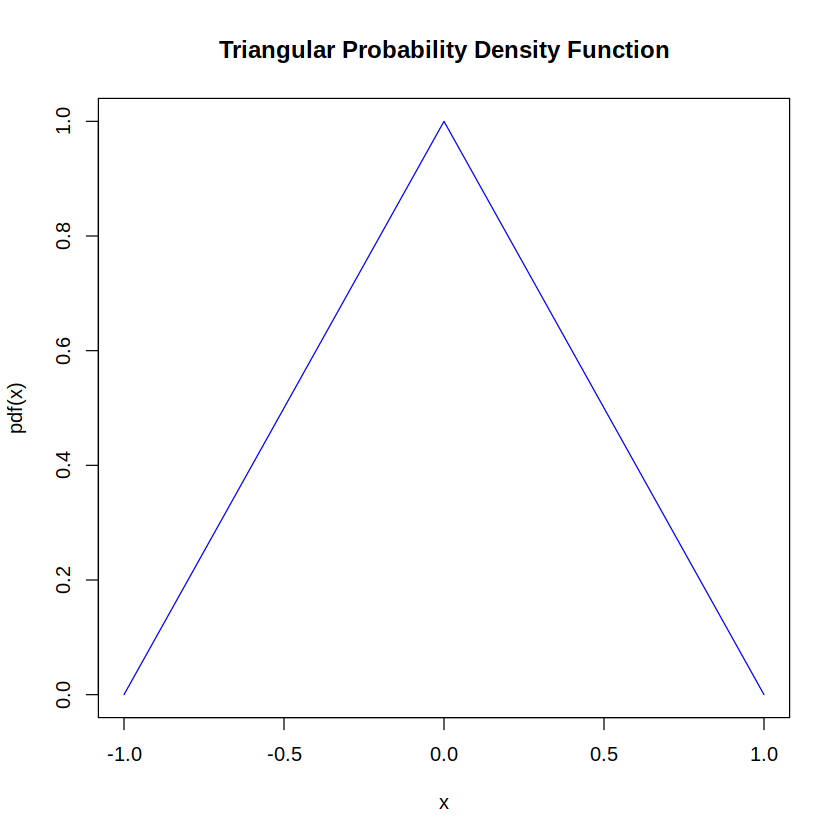

In [2]:
#define the values of the interval
a <- -1
b <- 1
c <- 0

#define the triangular pdf 
triangular_pdf <- function(a,b,c,x) {
  ifelse(x >= a & x < c, 2*(x-a)/((b-a)*(c-a)),                #if the first condition is not true do this :
      ifelse(x >= c & x <= b, 2*(b-x)/((b-a)*(b-c)), 0))    #if it is not true sent to 0
}

#define a sequence of points to be plotted
X<- seq(a,b,0.01)

#profduce the plot of the triangular pdf
plot(X, triangular_pdf(a,b,c,X), type="l", lty=1, lwd=1, col="blue", xlab="x", ylab="pdf(x)", main="Triangular Probability Density Function")

b) write an algorithm to generate random numbers from the triangular distribution


In [3]:
#define the generator (acceptance or rejection) of triangular distribuited points
triangular_generator <- function(n, pdf, n_points_unif) {
    n.accepts     <- 0
    data <- rep(NA, n)
    while (n.accepts<n){
        u <- runif(1,0,1)             #1 single rnd number between 0 and 1 from a uniform distribution
        y <- n_points_unif(1)   #n-rnd uniform numbers
        if (u < pdf(a,b,c,y)) {     #if the random number is 'under' the pdf it's accepted
            n.accepts <- n.accepts+1
            data[n.accepts] = y
        }
    }
    data
}

#this function generate a sequence of rnd distribuited points in (a,b)
n_points_unif <- function(n) runif(n,a,b)                   

c) generate 10 4 random number from the distribution, show them in an histogram and superimpose
the analytical curve

png 
  2

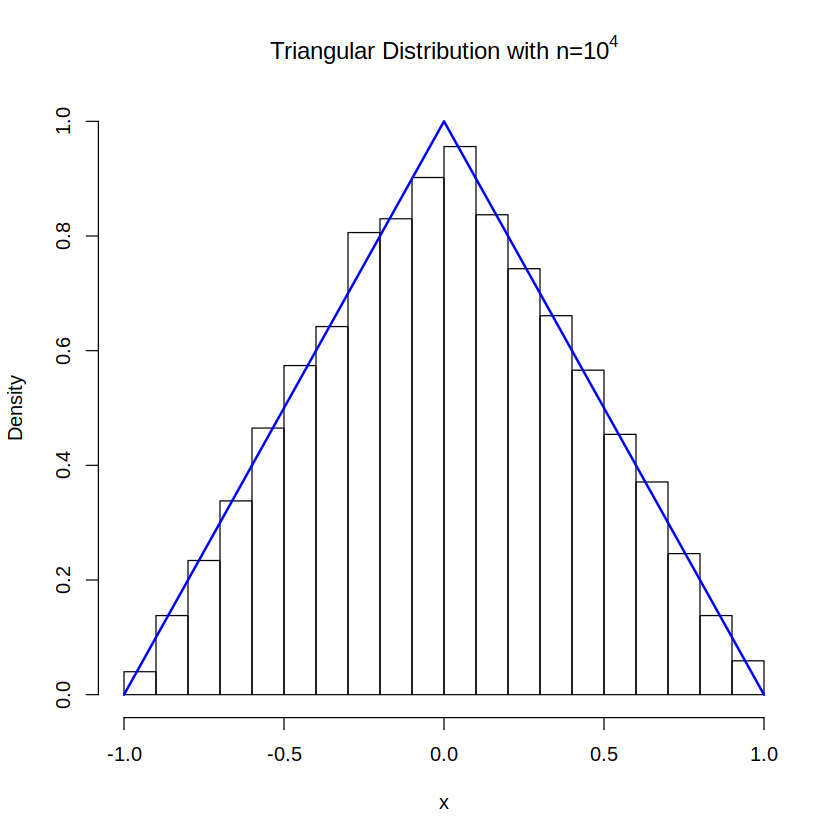

In [12]:
#numbers of points to be sampled
n <- 10**4

#sample this points
x <- triangular_generator(n, triangular_pdf,n_points_unif)

#plot the hist
hist(x, breaks = 20, freq = FALSE, main = expression(paste("Triangular Distribution with n=", 10^4)), ylim=c(0,1), xlab = "x", ylab = "Density")

#superimpose the triangular pdf
lines(X, triangular_pdf(a,b,c,X), type="l", lty=1, lwd=2, col="blue", ylim=c(0,1), xlab="x", ylab="pdf(x)", main="Triangular Probability Density Function")

#save the result to a pdf
pdf("hist_with_triangular.pdf")
hist(x, breaks = 20, freq = FALSE, main = expression(paste("Triangular Distribution with n=", 10^4)), ylim=c(0,1), xlab = "x", ylab = "Density")
lines(X, triangular_pdf(a,b,c,X), type="l", lty=1, lwd=2, col="blue", ylim=c(0,1), xlab="x", ylab="pdf(x)", main="Triangular Probability Density Function")
dev.off() # Close the PDF 

# Exercise 3

 the waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an
exponential pdf with rate 1/30

A) simulate the waiting time for 60 people at the doctor’s office and plot the relative histogram

B) what is the probability that a person will wait for less than 12 minutes ?

C) evaluate the average waiting time from the simulated data and compare it with the expected value

(calculated from theory and by manipulating the probability distributions using R)

D) what is the probability for waiting more than one hour before being received ?

#### A)
Simulate the waiting time for 60 people at the doctor’s office and plot the relative histogram


In [94]:
#set seed for reproducibility
set.seed(1234)

#define variables 
n <- 60
x_dexp <- seq(0, 100, by = 0.1) 
rate <- 1/30

# Define the exponential pdf ( set log=FALSE, so probabilities aren't given as log)
waiting_times <- rexp(n, rate) 

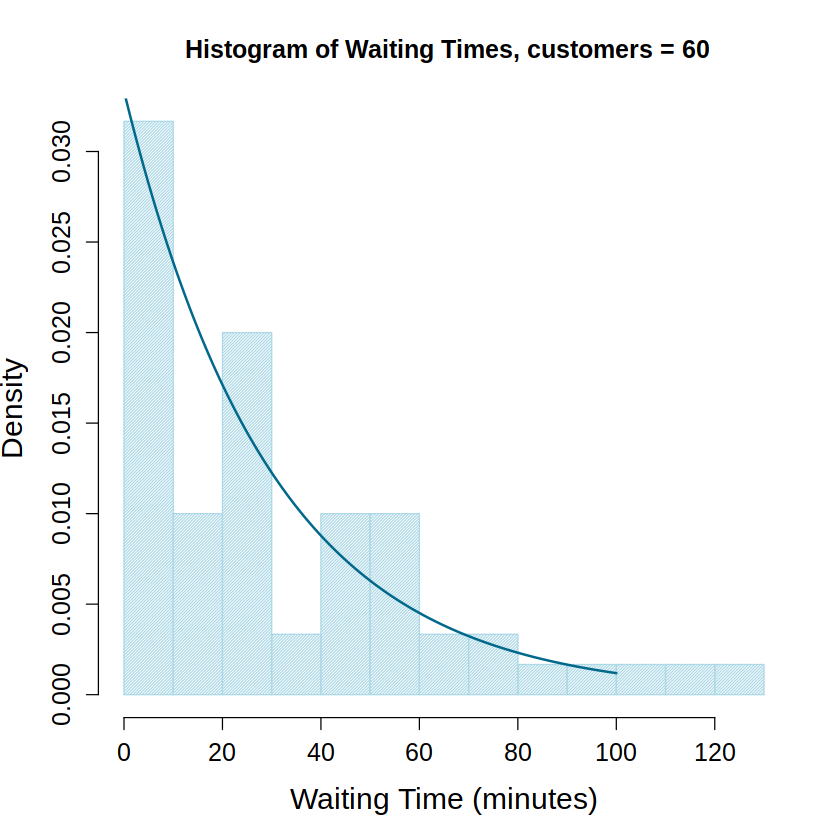

In [103]:
#Plot the relative histogram 
#ylim=c(0,20)
hist(waiting_times, breaks = 15, freq = FALSE,  density= 60,col = "lightblue",main = sprintf (" Histogram of Waiting Times, customers = %d", n), xlab = "Waiting Time (minutes)",cex.lab=1.5, cex.axis=1.25, cex.main=1.25, cex.sub=1.5)
lines(x_dexp, dexp(x_dexp,rate), col = "deepskyblue4", lwd = 2)

#### B) 
What is the probability that a person will wait for less than 12 minutes ?

The R function that allows us to calculate the probabilities of a random variable 'waiting time' taking values lower than 12min is the pexp function:

In [63]:
# Probability of waiting less than 12 minutes
p <- pexp(12, rate = 1/30)
cat("The probability of waiting less than 12 min is : ", p*100, "%\n")

The probability of waiting less than 12 min is :  32.968 %


#### C)
Evaluate the average waiting time from the simulated data and compare it with the expected value


In [99]:
# average waiting time from the simulated data
average_sim <- mean(waiting_times)        #waiting time = simulated data
cat("The average waiting time from the simulated data is : ", round(average_sim, digits = 0) , "minutes\n")

# expected value of average waiting time 
cat("The average waiting time from theory is : ", 1/rate , "minutes\n")
cat("The two values are not exactly the same due to random variation, but they are close to each other, which indicates that the simulation is valid.")

The average waiting time from the simulated data is :  32 minutes
The average waiting time from theory is :  30 minutes
The two values are not exactly the same due to random variation, but they are close to each other, which indicates that the simulation is valid.

#### D)
What is the probability for waiting more than one hour before being received ?

In [98]:
# Probability of waiting more than one hour
p <- pexp(60, rate = 1/30)
cat("The probability of waiting more than 1 hour is : ", (1-p)*100, "%\n")

The probability of waiting more than 1 hour is :  13.53353 %


# Exercise 4 - Multiple choices exams

• the final exam of a course is given to the students in the format of a multiple choice written test:
for each questions there are five possible alternatives

• a student either knows the answer, or selects randomly the answer among the five possible choices

• assuming p = 0.7 the probability that the student knows the answer, once a correct answer is given,
what it the probability that the student really knew the correct answer ?

In [ ]:
# Probability of knowing the answer
p_knows <- 0.7

# Probability of selecting the correct answer at random 1/5
p_random <- 0.2

In [ ]:
# Probability of knowing the answer
p_knows <- 0.7

# Probability of selecting the correct answer at random
p_random <- 0.2

# Probability of selecting the correct answer if the student knows the answer
p_correct_given_knows <- 1

# Probability of selecting the correct answer if the student doesn't know the answer
p_correct_given_random <- 0.2

# Probability of selecting the correct answer overall
p_correct <- p_knows * p_correct_given_knows + (1 - p_knows) * p_correct_given_random

# Probability that the student really knew the correct answer
p_knows_given_correct <- p_knows * p_correct_given_knows / p_correct

# Print the result
print(p_knows_given_correct)


# Exercise 5 - Waiting time

• starting from 5:00 in the morning, every half an hour there is a train from Milano Centrale to Roma Termini. We assume there is always an available seat on a train leaving from Milano

• assuming a person arrives at a random time between 10:45 and 11:45 and compute the probability
that she has to wait

 a) at most 10 minutes
 b) at least 15 minutes
 c) what is the average time spent waiting ?

In [134]:
# Define the arrival time distribution
arrive_dist <- runif(1e6, min = 10.75, max = 11.75)

# Define the train schedule
train_schedule <- seq(from = 5, to = 22, by = 0.5)

# Calculate the probability of waiting at most 10 minutes
prob_wait_10 <- mean(train_schedule[which(train_schedule > arrive_dist + 0.1667)[1]] - arrive_dist <= 0.1667)
prob_wait_10

#b) To compute the probability that the person has to wait at least 15 minutes, we need to find the probability that the person arrives before the train leaving at 11:30. So we can model the arrival time as a uniform distribution between 10:45 and 11:45, and calculate the probability of the event "arrival time is before 11:30 minus 15 minutes":
# Calculate the probability of waiting at least 15 minutes
prob_wait_15 <- mean(train_schedule[which(train_schedule > arrive_dist + 0.1667)[1]] - arrive_dist >= 0.25)
prob_wait_15

#c) To compute the average time spent waiting, we can first calculate the waiting time for each arrival time, and then take the mean of the waiting times:

# Calculate the waiting time for each arrival time
waiting_time <- train_schedule[which(train_schedule > arrive_dist + 0.1667)[1]] - arrive_dist

# Calculate the average waiting time
mean_waiting_time <- mean(waiting_time)
mean_waiting_time


Warning message in train_schedule > arrive_dist + 0.1667:
“longer object length is not a multiple of shorter object length”

[1] 0

Warning message in train_schedule > arrive_dist + 0.1667:
“longer object length is not a multiple of shorter object length”

[1] 1

Warning message in train_schedule > arrive_dist + 0.1667:
“longer object length is not a multiple of shorter object length”

[1] 0.7497773

# Exercise 6 - stock investment

In [ ]:
mean_return <- 0.1    # mean return rate
sd_return <- 0.12     # standard deviation of return rate
num_shares <- 200     # number of shares
price_per_share <- 85 # price per share

# Compute the distribution of the net profit after one year
profit_dist <- rnorm(100000, mean = num_shares * price_per_share * (1 + mean_return), sd = num_shares * price_per_share * sd_return)

# Compute the probability that the net profit is at least 800 euros
prob_profit_800 <- mean(profit_dist >= (num_shares * price_per_share + 800))

cat(sprintf("The probability of Mr. X's net profit being at least 800 euros after one year is %f\n", prob_profit_800))
